In [4]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy

#grafico
import matplotlib.pyplot as plt
#import seaborn as sns
from IPython.display import display
%matplotlib inline
#sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

"""
BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
from graphs import *
"""

SEED = 29082013
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

subfolder = "data"
os.listdir(subfolder)

['prd23crm.xlsx',
 'prd01mcs.xlsx',
 'Categorias configuradas en ZABBIX.xlsx',
 '.~lock.Incidencias Resumen.xlsx#',
 'prd08mcs.xlsx',
 'Incidencias Resumen.xlsx',
 '.~lock.Eventos ZABBIX - Ultima Semana NOV.xlsx#',
 'Alertas Zabbix - Septiembre.xlsx',
 'webmvmwlnxv11.txt',
 'Eventos ZABBIX - Ultima Semana NOV.xlsx']

In [5]:
use_cols = [
    'hostid', 'host', 'itemid', 'hostid.1', 'history', 'trends',
    'status', 'value', 'clock', 'from_unixt', 'ime(c.clock)'
]
dtypes = {
    'hostid': str, 
    'host': str, 
    'itemid': str, 
    'hostid.1': str,
    1: str, 2: str, 3: str, 4: str
}
read_parameters = {
    'header': 1,
    'sep': ',',
    'usecols': use_cols,
    'dtype': dtypes
    
}
read_parameters_txt = {
    'sep': '|',
    'header': None,
    'dtype': dtypes
}
col_date = 'date_hour'

In [6]:
def read_csv_server(csv_name):
    data = pd.read_csv(
        "{}/{}".format(subfolder, csv_name), **read_parameters
    ).iloc[1:-1]
    
    data[col_date] = data['from_unixt'].astype(str) + ' ' + data['ime(c.clock)'].astype(str)
    data[col_date] = pd.to_datetime(
        data[col_date], 
        errors='coerce', 
        format='%d/%m/%Y %H:%M:%S'
    )
    data = data.sort_values(by=[col_date])
    data.set_index(col_date, inplace=True)
    
    data['value'] = data['value'].astype(float)
    data['clock'] = data['clock'].astype(int)
    data['status'] = data['status'].astype(int)
    
    return data[use_cols[:-2]]

In [10]:
pd.read_csv("data/prd08mcs.csv")

,+,-------,-+,---------,-+.1,-------.1,-+.2,-------.2,-+.3,---------.1,...,+.2,-------.3,-+.4,--------.1,-+.5,-----------,-+.6,-----------.1,-------------,+.3
0,|,hostid,|,host,|,itemid,|,hostid,|,history,...,|,status,|,value,|,clock,|,from_unixt,ime(c.clock),|
1,+,-------,-+,---------,-+,-------,-+,-------,-+,---------,...,+,-------,-+,--------,-+,-----------,-+,-----------,-------------,+
2,|,10707,|,prd08mcs,|,85242,|,10707,|,1w,...,|,0,|,78.316,|,1574712942,|,25/11/2019,15:15:42,|
3,|,10707,|,prd08mcs,|,85243,|,10707,|,1w,...,|,0,|,96.4333,|,1574712943,|,25/11/2019,15:15:43,|
4,|,10707,|,prd08mcs,|,85244,|,10707,|,1w,...,|,0,|,84.9153,|,1574712945,|,25/11/2019,15:15:45,|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,|,10707,|,prd08mcs,|,85248,|,10707,|,1w,...,|,0,|,96.7425,|,1574714928,|,25/11/2019,15:48:48,|
999,|,10707,|,prd08mcs,|,85249,|,10707,|,1w,...,|,0,|,53.7723,|,1574714930,|,25/11/2019,15:48:50,|
1000,|,10707,|,prd08mcs,|,85250,|,10707,|,1w,...,|,0,|,56.8691,|,1574714930,|,25/11/2019,15:48:50,|
1001,|,10707,|,prd08mcs,|,85251,|,10707,|,1w,...,|,0,|,97.6133,|,1574714931,|,25/11/2019,15:48:51,|


In [200]:
def read_txt_server_without_head(csv_name):    
    data = pd.read_csv(
        "{}/{}".format(subfolder, csv_name), **read_parameters_txt
    ).iloc[:-2, 1:-1]
    
    data.columns = use_cols[:-2] + [col_date]
    data[col_date] = pd.to_datetime(data[col_date])
    data = data.sort_values(by=[col_date])
    data.set_index(col_date, inplace=True)
    
    data['value'] = data['value'].astype(float)
    data['clock'] = data['clock'].astype(int)
    data['status'] = data['status'].astype(int)
    
    return data

In [201]:
prd08mcs = read_csv_server('prd08mcs.csv')
prd01mcs = read_csv_server('prd01mcs.csv')
prd23crm = read_csv_server('prd23crm.csv')
webmvmwlnxv11 = read_txt_server_without_head('webmvmwlnxv11.txt')

In [202]:
display(prd08mcs.head(3))
display(prd08mcs.tail(3))
print("/"*100)
display(prd01mcs.head(3))
display(prd01mcs.tail(3))
print("/"*100)
display(prd23crm.head(3))
display(prd23crm.tail(3))
print("/"*100)
display(webmvmwlnxv11.head(3))
display(webmvmwlnxv11.tail(3))

,hostid,host,itemid,hostid.1,history,trends,status,value,clock
date_hour,,,,,,,,,
2019-11-25 15:15:42,10707,prd08mcs,85242,10707,1w,365d,0,78.3160,1574712942
2019-11-25 15:15:43,10707,prd08mcs,85243,10707,1w,365d,0,96.4333,1574712943
2019-11-25 15:15:45,10707,prd08mcs,85244,10707,1w,365d,0,84.9153,1574712945


,hostid,host,itemid,hostid.1,history,trends,status,value,clock
date_hour,,,,,,,,,
2019-11-25 15:48:50,10707,prd08mcs,85249,10707,1w,365d,0,53.7723,1574714930
2019-11-25 15:48:50,10707,prd08mcs,85250,10707,1w,365d,0,56.8691,1574714930
2019-11-25 15:48:51,10707,prd08mcs,85251,10707,1w,365d,0,97.6133,1574714931


////////////////////////////////////////////////////////////////////////////////////////////////////


,hostid,host,itemid,hostid.1,history,trends,status,value,clock
date_hour,,,,,,,,,
2019-09-03 14:07:10,10700,prd01mcs,103516,10700,90d,365d,0,1.0,1567537630
2019-09-03 14:07:10,10700,prd01mcs,103517,10700,90d,365d,0,1.0,1567537630
2019-09-03 14:07:10,10700,prd01mcs,103518,10700,90d,365d,0,1.0,1567537630


,hostid,host,itemid,hostid.1,history,trends,status,value,clock
date_hour,,,,,,,,,
2019-09-03 15:29:45,10700,prd01mcs,103529,10700,90d,365d,0,1.0,1567542585
2019-09-03 15:29:45,10700,prd01mcs,103527,10700,90d,365d,0,1.0,1567542585
2019-09-03 15:30:25,10700,prd01mcs,103516,10700,90d,365d,0,1.0,1567542625


////////////////////////////////////////////////////////////////////////////////////////////////////


,hostid,host,itemid,hostid.1,history,trends,status,value,clock
date_hour,,,,,,,,,
2019-11-25 17:31:14,10692,prd23crm,84554,10692,1w,365d,0,91.4963,1574721074
2019-11-25 17:31:15,10692,prd23crm,84555,10692,1w,365d,0,99.9725,1574721075
2019-11-25 17:31:17,10692,prd23crm,84556,10692,1w,365d,0,99.9391,1574721077


,hostid,host,itemid,hostid.1,history,trends,status,value,clock
date_hour,,,,,,,,,
2019-11-25 18:06:41,10692,prd23crm,84581,10692,1w,365d,0,88.5127,1574723201
2019-11-25 18:06:42,10692,prd23crm,84582,10692,1w,365d,0,90.4631,1574723202
2019-11-25 18:06:42,10692,prd23crm,82542,10692,1w,365d,0,84.7686,1574723202


////////////////////////////////////////////////////////////////////////////////////////////////////


,hostid,host,itemid,hostid.1,history,trends,status,value,clock
date_hour,,,,,,,,,
2019-11-25 18:55:05,10438,webmvmwlnxv11,87155,10438,90d,365d,0,10.9633,1574726105
2019-11-25 18:55:35,10438,webmvmwlnxv11,87155,10438,90d,365d,0,10.9600,1574726135
2019-11-25 18:56:05,10438,webmvmwlnxv11,87155,10438,90d,365d,0,10.9755,1574726165


,hostid,host,itemid,hostid.1,history,trends,status,value,clock
date_hour,,,,,,,,,
2019-11-26 10:59:05,10438,webmvmwlnxv11,87155,10438,90d,365d,0,12.4517,1574783945
2019-11-26 10:59:35,10438,webmvmwlnxv11,87155,10438,90d,365d,0,12.4551,1574783975
2019-11-26 10:59:52,10438,webmvmwlnxv11,55552,10438,1w,365d,0,91.9488,1574783992


In [203]:
prd08mcs.shape, prd01mcs.shape, prd23crm.shape, webmvmwlnxv11.shape

((1000, 9), (1000, 9), (1000, 9), (2003, 9))

In [204]:
display(prd08mcs.describe().T)
display(prd01mcs.describe().T)
display(prd23crm.describe().T)
display(webmvmwlnxv11.describe().T)

,count,mean,std,min,25%,50%,75%,max
status,1000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
value,1000.0,8.469173e+01,23.092105,5.450000e-02,7.831600e+01,9.674250e+01,9.962400e+01,9.999950e+01
clock,1000.0,1.574714e+09,577.644839,1.574713e+09,1.574713e+09,1.574714e+09,1.574714e+09,1.574715e+09


,count,mean,std,min,25%,50%,75%,max
status,1000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
value,1000.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
clock,1000.0,1.567540e+09,1444.174288,1.567538e+09,1.567539e+09,1.567540e+09,1.567541e+09,1.567543e+09


,count,mean,std,min,25%,50%,75%,max
status,1000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
value,1000.0,8.355999e+01,24.859973,7.500000e-03,7.913820e+01,9.538905e+01,9.966810e+01,9.999440e+01
clock,1000.0,1.574722e+09,618.871232,1.574721e+09,1.574722e+09,1.574722e+09,1.574723e+09,1.574723e+09


,count,mean,std,min,25%,50%,75%,max
status,2003.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
value,2003.0,1.462327e+01,15.050186,1.091850e+01,1.122680e+01,1.170070e+01,1.223085e+01,9.197830e+01
clock,2003.0,1.574756e+09,17163.878900,1.574726e+09,1.574741e+09,1.574756e+09,1.574771e+09,1.574784e+09


In [221]:
webmvmwlnxv11.shape

(2003, 9)

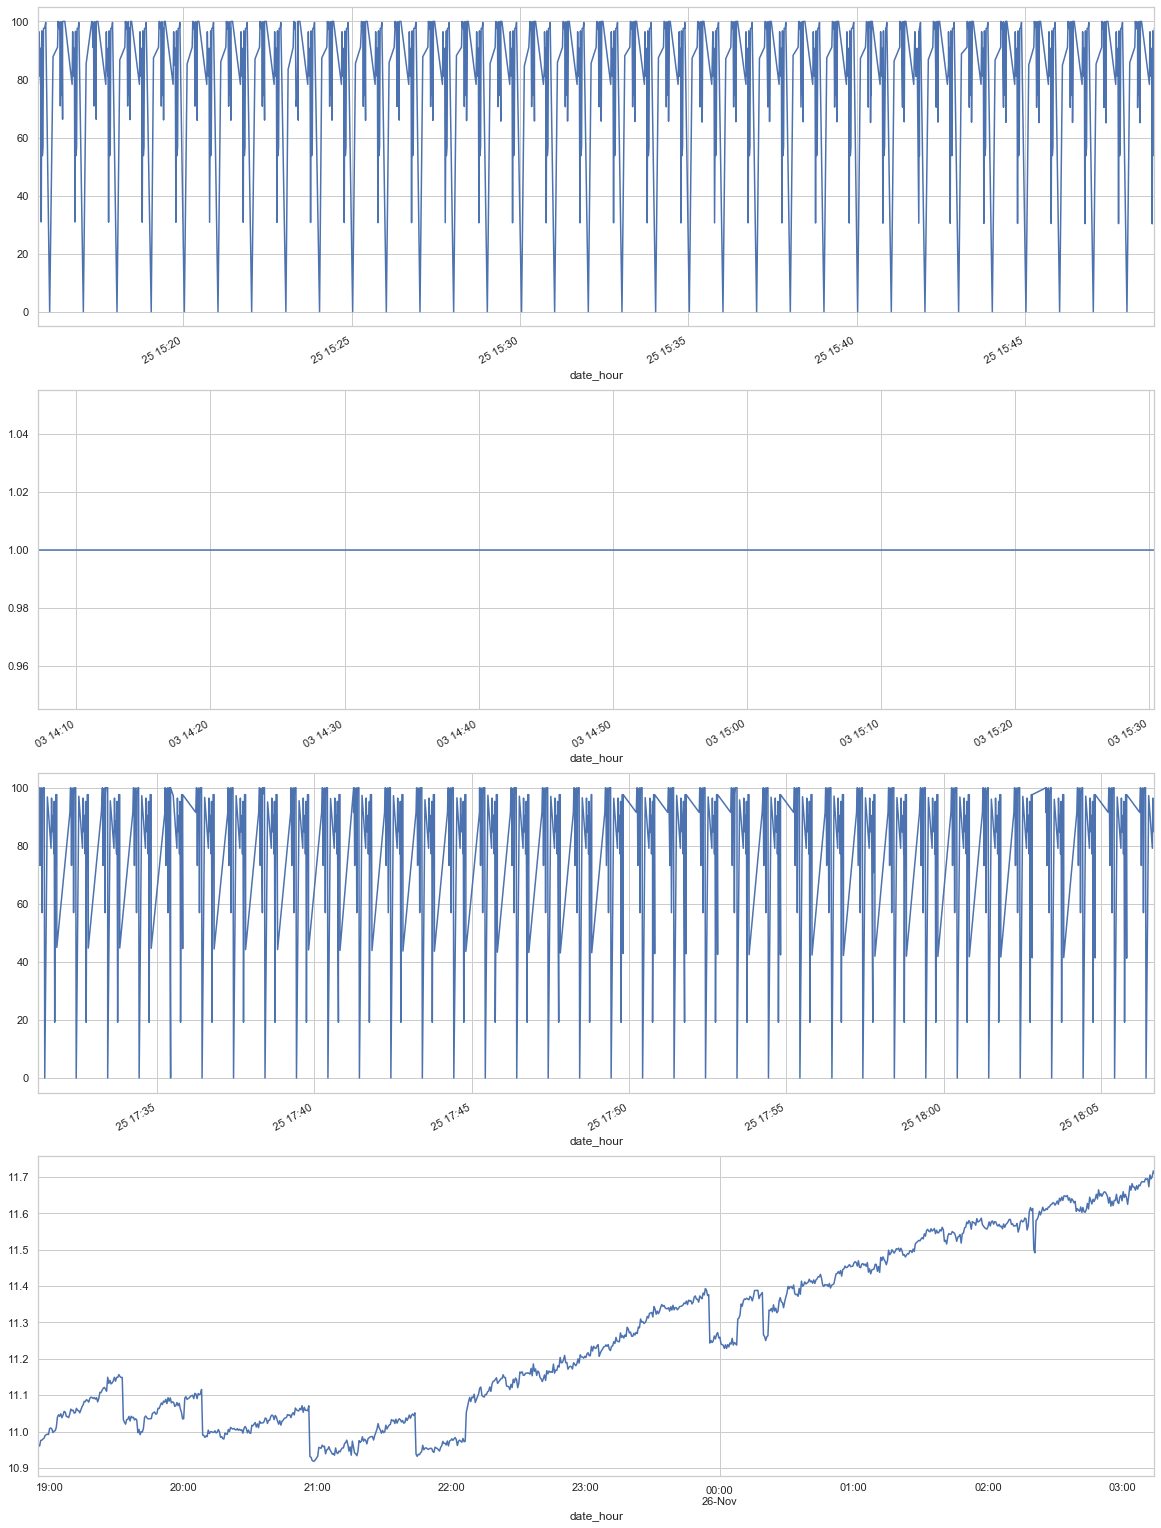

In [219]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 30))
prd08mcs['value'][:1000].plot(ax=axes[0])
prd01mcs['value'][:1000].plot(ax=axes[1])
prd23crm['value'][:1000].plot(ax=axes[2])
webmvmwlnxv11['value'][:1000].plot(ax=axes[3])

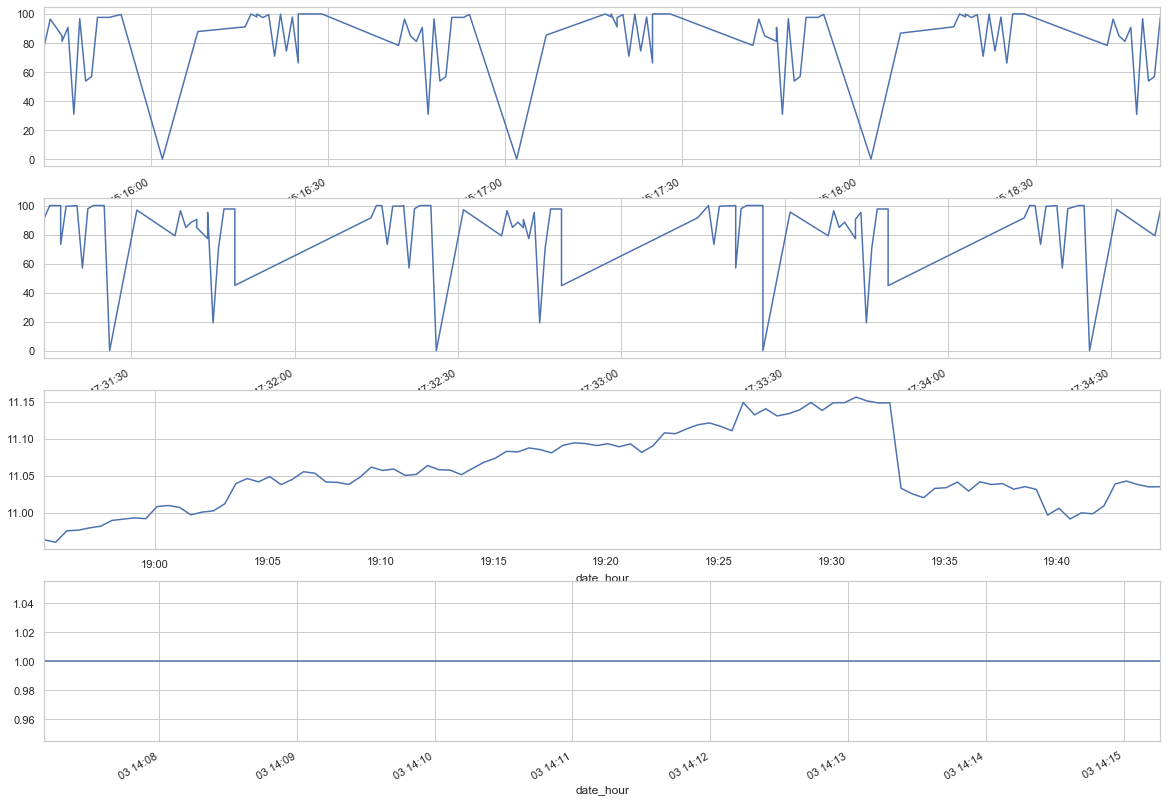

In [217]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 15))
prd08mcs['value'][:100].plot(ax=axes[0])
prd23crm['value'][:100].plot(ax=axes[1])
webmvmwlnxv11['value'][:100].plot(ax=axes[2])
prd01mcs['value'][:100].plot(ax=axes[3])

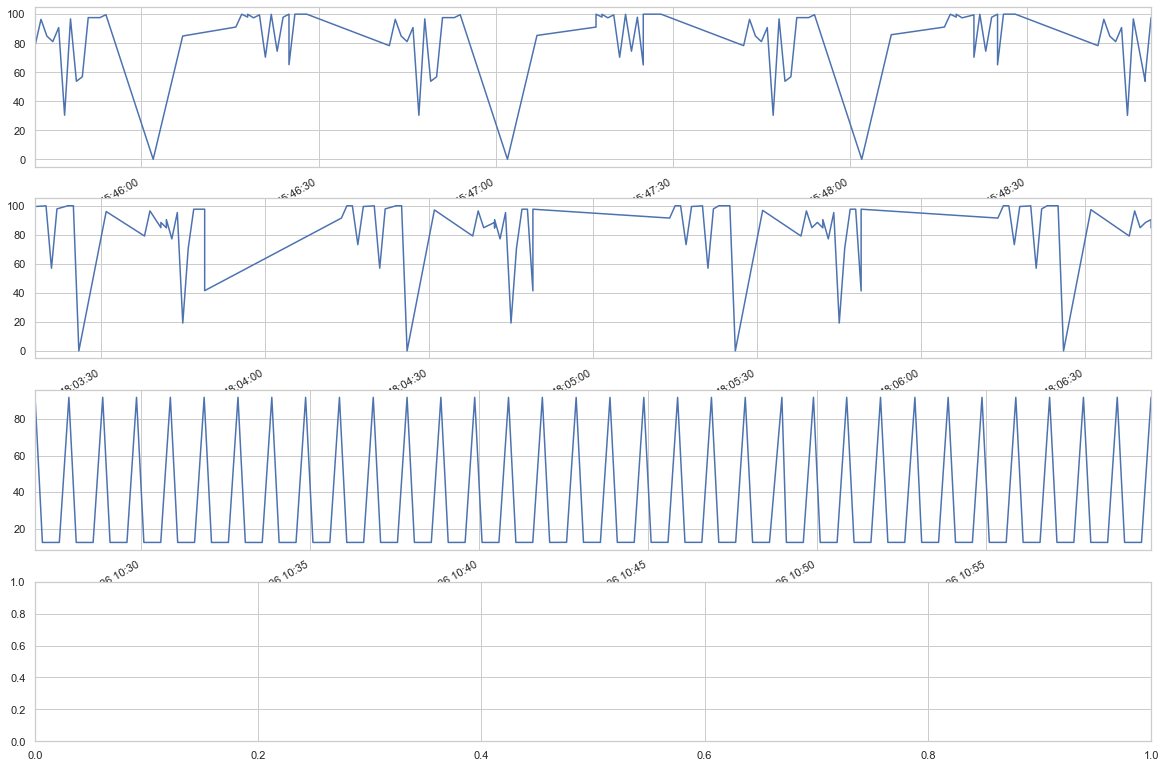

In [222]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 15))
prd08mcs['value'][-100:].plot(ax=axes[0])
prd23crm['value'][-100:].plot(ax=axes[1])
webmvmwlnxv11['value'][-100:].plot(ax=axes[2])
#prd01mcs['value'][-100:].plot(ax=axes[3])